## 4장 7절 데이터 불균형 문제 처리

### 1. 언더 샘플링(Under Sampling)

In [1]:
!pip install imbalanced-learn

   ---------------------------------------- 0.0/258.0 kB ? eta -:--:--
   - -------------------------------------- 10.2/258.0 kB ? eta -:--:--
   - -------------------------------------- 10.2/258.0 kB ? eta -:--:--
   - -------------------------------------- 10.2/258.0 kB ? eta -:--:--
   - -------------------------------------- 10.2/258.0 kB ? eta -:--:--
   - -------------------------------------- 10.2/258.0 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/258.0 kB 81.9 kB/s eta 0:00:03
   ---- ----------------------------------- 30.7/258.0 kB 81.9 kB/s eta 0:00:03
   ------ --------------------------------- 41.0/258.0 kB 93.7 kB/s eta 0:00:03
   --------- ----------------------------- 61.4/258.0 kB 131.3 kB/s eta 0:00:02
   --------- ----------------------------- 61.4/258.0 kB 131.3 kB/s eta 0:00:02
   ------------- ------------------------- 92.2/258.0 kB 163.8 kB/s eta 0:00:02
   ------------------ ------------------- 122.9/258.0 kB 212.1 kB/s eta 0:00:01
   ------

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

In [42]:
x,y=make_classification(n_samples=2000, n_features=6, weights=[0.95], flip_y=0)
print(Counter(y))


Counter({0: 1900, 1: 100})


#### Random Under Sampling

In [43]:
undersample = RandomUnderSampler(sampling_strategy='majority')
x_under, y_under = undersample.fit_resample(x,y)


print(Counter(y_under))


Counter({0: 100, 1: 100})


In [44]:
undersample = RandomUnderSampler(sampling_strategy=0.5)
x_under2, y_under2 = undersample.fit_resample(x,y)

print(Counter(y_under2))

Counter({0: 200, 1: 100})


### 2. 오버 샘플링(Over Sampling)

#### Random Over Sampling

In [45]:
from imblearn.over_sampling import RandomOverSampler

In [46]:
oversample = RandomOverSampler(sampling_strategy=0.5)
x_over, y_over = oversample.fit_resample(x,y)
print(Counter(y_over))

Counter({0: 1900, 1: 950})


In [47]:
oversample = RandomOverSampler(sampling_strategy='minority')
x_over2, y_over2 = oversample.fit_resample(x,y)
print(Counter(y_over2))

Counter({0: 1900, 1: 1900})


#### SMOTE(Synthetic Minority Over-sampling Technique)

In [48]:
from imblearn.over_sampling import SMOTE

In [49]:
smote_sample = SMOTE(sampling_strategy='minority')
x_sm, y_sm = smote_sample.fit_resample(x,y)
print(Counter(y_sm))

Counter({0: 1900, 1: 1900})


In [50]:
from matplotlib import pyplot as plt
import seaborn as sns

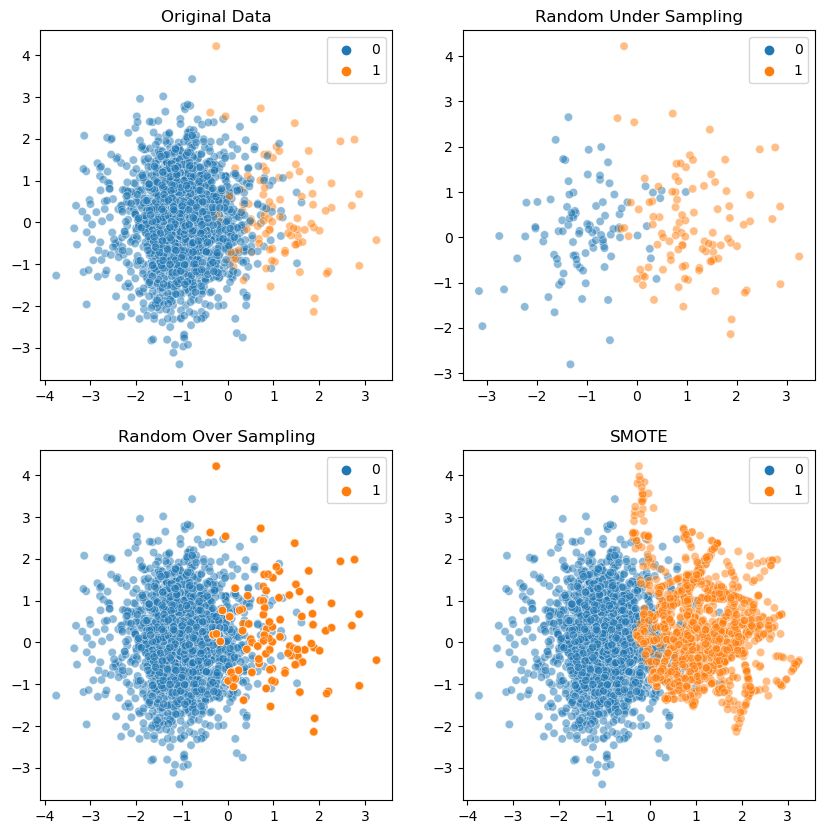

In [58]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
sns.scatterplot(x=x[:,1], y=x[:, 2], hue=y, ax=axes[0][0], alpha=0.5)
sns.scatterplot(x=x_under[:,1], y=x_under[:,2], hue=y_under, ax=axes[0][1], alpha=0.5)
sns.scatterplot(x=x_over[:,1], y=x_over[:,2], hue=y_over, ax=axes[1][0], alpha=0.5)
sns.scatterplot(x=x_sm[:,1], y=x_sm[:,2], hue=y_sm, ax=axes[1][1], alpha=0.5)

axes[0][0].set_title('Original Data')
axes[0][1].set_title('Random Under Sampling')
axes[1][0].set_title('Random Over Sampling')
axes[1][1].set_title('SMOTE')

plt.show()
